In [101]:
import pandas as pd
import logging
import matplotlib.pyplot as plt
import numpy as np

# create an instance of the logger
logger = logging.getLogger()

# Change current directory to parent directory
import os
os.chdir("..")
os.chdir("Team-2-2024Fall")


## Load the File

In [102]:
# Define global variables
RAW_PATH_MARKET_2014 = 'data/raw/rpt.00013060.0000000000000000.DAMLZHBSPP_2014.xlsx'

# Check if the file exists
if os.path.exists(RAW_PATH_MARKET_2014):
    # Load the file
    market_data_2014 = pd.ExcelFile(RAW_PATH_MARKET_2014)
else:
    print("File not found:", RAW_PATH_MARKET_2014)

## Average and Max Settlement Point Price For Each Month In 2014

In [103]:
# Initialize a dictionary to store average prices for each month
average_prices = {}
# Initialize a dictionary to store max prices for each month
max_prices = {}

# Iterate over each sheet (representing each month)
for sheet_name in market_data_2014.sheet_names:
    # Load the data from the current sheet
    sheet_data = market_data_2014.parse(sheet_name)
    
    # Ensure the column "Settlement Point Price" exists before processing
    if "Settlement Point Price" in sheet_data.columns:
        # Calculate the average price for the current month
        average_price = sheet_data["Settlement Point Price"].mean()
        # Store the average price in the dictionary with the sheet name as the key
        average_prices[sheet_name] = average_price
        # Calculate the max price for the current month
        max_price=sheet_data["Settlement Point Price"].max()
        # Store the max price in the dictionary with the sheet name as the key
        max_prices[sheet_name]=max_price

# Convert the dictionary for average prices to a DataFrame for easier plotting
average_prices_df = pd.DataFrame(list(average_prices.items()), columns=["Month", "Average Price"])

# Convert the dictionary for max prices to a DataFrame for easier plotting
max_prices_df = pd.DataFrame(list(max_prices.items()), columns=["Month", "Max Price"])



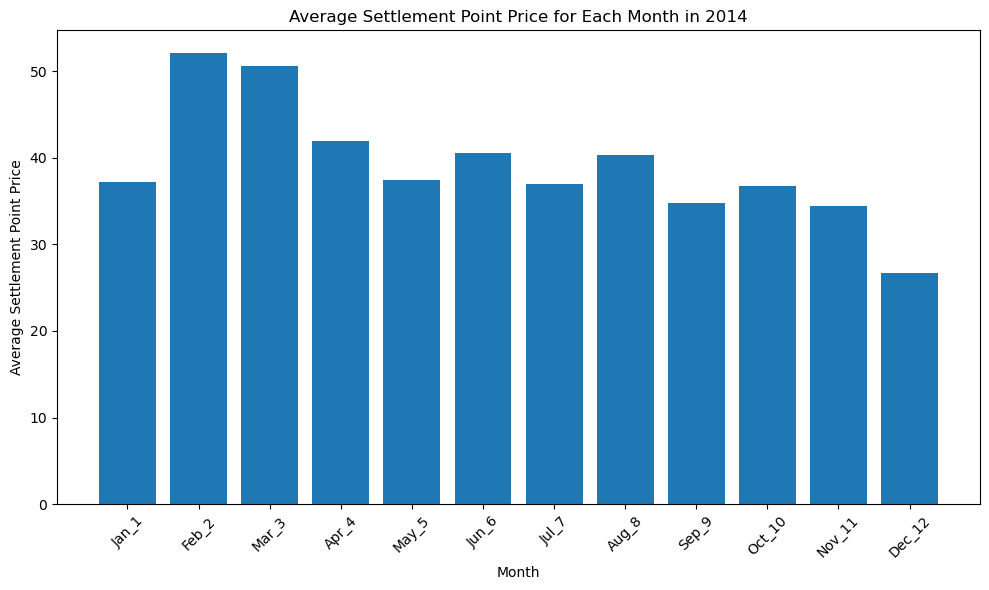

In [104]:

# Define the correct order for months
month_order = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]

# Create a new column to extract the month name for ordering
average_prices_df['Month_Short'] = average_prices_df['Month'].str[:3]  # Extract first three letters

# Sort the DataFrame based on the defined order
average_prices_df['Month_Order'] = pd.Categorical(
    average_prices_df['Month_Short'], categories=month_order, ordered=True
)
average_prices_df = average_prices_df.sort_values('Month_Order')

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(average_prices_df["Month"], average_prices_df["Average Price"])
plt.xlabel("Month")
plt.ylabel("Average Settlement Point Price")
plt.title("Average Settlement Point Price for Each Month in 2014")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

### Determine Threshold for Low and High Season based on Mean and Standard Deviation Approach

High Threshold: 46.04520840599304
High Threshold based on Average: 39.15864263609151
Low Threshold: 32.27207686618998


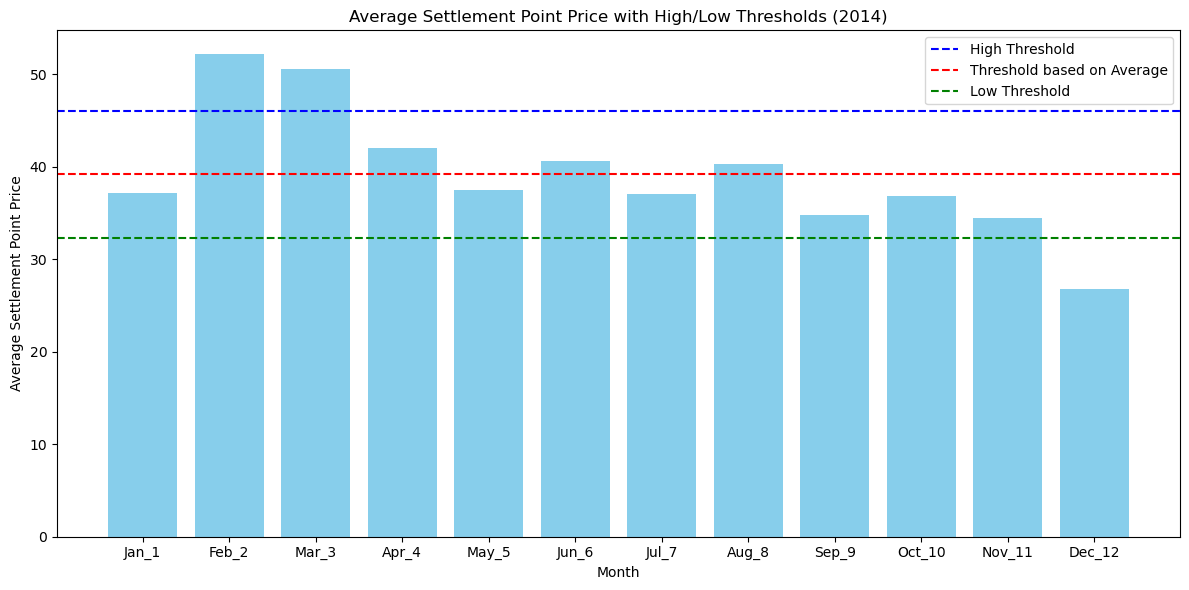

In [105]:
# Calculate mean and standard deviation of average prices for threshold determination
mean_price = average_prices_df["Average Price"].mean()
std_dev = average_prices_df["Average Price"].std()

# Define high, avg_threshold and low thresholds
high_threshold = mean_price + std_dev
avg_threshold=mean_price
low_threshold = mean_price - std_dev

# Print the thresholds
print(f"High Threshold: {high_threshold}")
print(f"High Threshold based on Average: {avg_threshold}")
print(f"Low Threshold: {low_threshold}")

# Plot the bar chart with thresholds
plt.figure(figsize=(12, 6))
plt.bar(average_prices_df["Month"], average_prices_df["Average Price"], color="skyblue")
plt.axhline(high_threshold, color="blue", linestyle="--", label="High Threshold")
plt.axhline(avg_threshold, color="red", linestyle="--", label="Threshold based on Average")
plt.axhline(low_threshold, color="green", linestyle="--", label="Low Threshold")
plt.xlabel("Month")
plt.ylabel("Average Settlement Point Price")
plt.title("Average Settlement Point Price with High/Low Thresholds (2014)")
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

In [106]:
# Filter months based on thresholds

# Months over and under the average threshold (mean-based)
months_over_avg = average_prices_df[average_prices_df["Average Price"] > avg_threshold]["Month"].tolist()
months_under_avg = average_prices_df[average_prices_df["Average Price"] < avg_threshold]["Month"].tolist()

# Display the results
results = {
    "Months Over Average Threshold": months_over_avg,
    "Months Under Average Threshold": months_under_avg,
}

results


{'Months Over Average Threshold': ['Feb_2',
  'Mar_3',
  'Apr_4',
  'Jun_6',
  'Aug_8'],
 'Months Under Average Threshold': ['Jan_1',
  'May_5',
  'Jul_7',
  'Sep_9',
  'Oct_10',
  'Nov_11',
  'Dec_12']}

### Determine Threshold for Low and High Season based on Percentile-Based Approach

High Threshold (75th Percentile): 40.92447792658731
Median  Threshold (50th Percentile): 37.3115077764977
Low Threshold (25th Percentile): 36.29407806099591


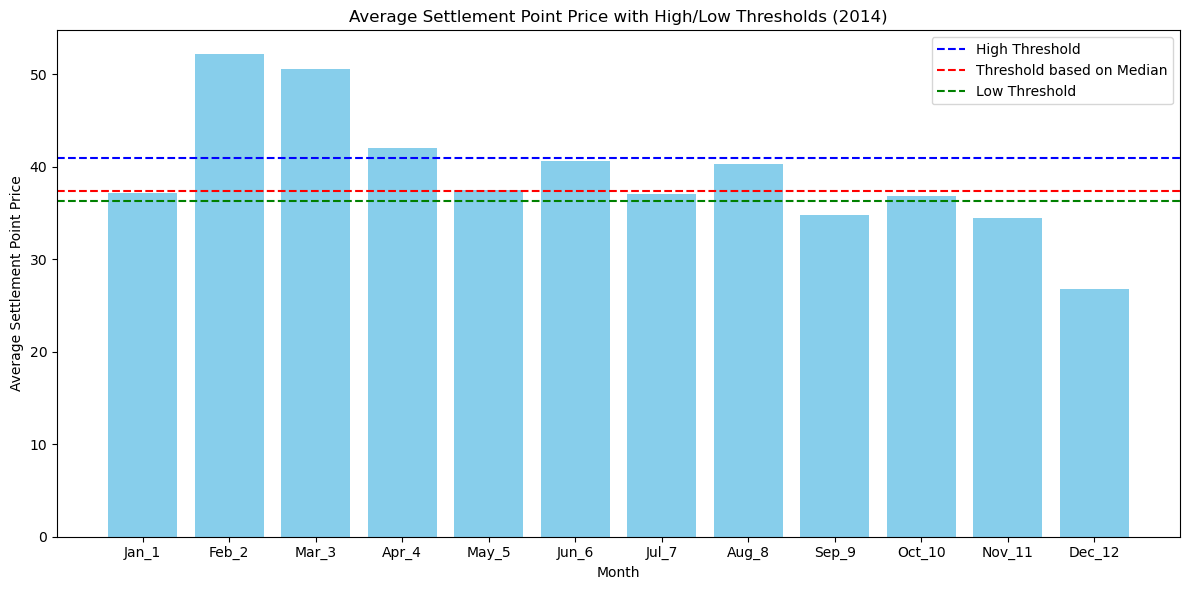

In [107]:
# Define high (Higher Quartile), Median and low (Low Quartile) thresholds using Percentile-Based Approach
high_threshold_per = average_prices_df["Average Price"].quantile(0.75)
median_threshold_per=average_prices_df["Average Price"].quantile(0.50)
low_threshold_per = average_prices_df["Average Price"].quantile(0.25)
# Print the thresholds
print(f"High Threshold (75th Percentile): {high_threshold_per}")
print(f"Median  Threshold (50th Percentile): {median_threshold_per}")
print(f"Low Threshold (25th Percentile): {low_threshold_per}")


# Plot the bar chart with thresholds
plt.figure(figsize=(12, 6))
plt.bar(average_prices_df["Month"], average_prices_df["Average Price"], color="skyblue")
plt.axhline(high_threshold_per, color="blue", linestyle="--", label="High Threshold")
plt.axhline(median_threshold_per, color="red", linestyle="--", label="Threshold based on Median")
plt.axhline(low_threshold_per, color="green", linestyle="--", label="Low Threshold")
plt.xlabel("Month")
plt.ylabel("Average Settlement Point Price")
plt.title("Average Settlement Point Price with High/Low Thresholds (2014)")
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

In [108]:
# Filter months based on thresholds

# Months over and under the median threshold (percentile-based)
months_over_median = average_prices_df[average_prices_df["Average Price"] > median_threshold_per]["Month"].tolist()
months_under_median = average_prices_df[average_prices_df["Average Price"] < median_threshold_per]["Month"].tolist()


# Display the results
results = {
    "Months Over Median Threshold": months_over_median,
    "Months Under Median Threshold": months_under_median,
}

results


{'Months Over Median Threshold': ['Feb_2',
  'Mar_3',
  'Apr_4',
  'May_5',
  'Jun_6',
  'Aug_8'],
 'Months Under Median Threshold': ['Jan_1',
  'Jul_7',
  'Sep_9',
  'Oct_10',
  'Nov_11',
  'Dec_12']}

### It seems the months over and under the median and average thresholds are identical in this dataset.

### Hence we determine the 

###  Months of High Seasons as: **['Jan', 'Feb', 'Mar', 'May', 'Sep', 'Nov']**
### Months of High Seasons as: **['Apr', 'Jun', 'Jul', 'Aug', 'Oct', 'Dec']**

## Max Settlement Point Price for Each Month in 2014

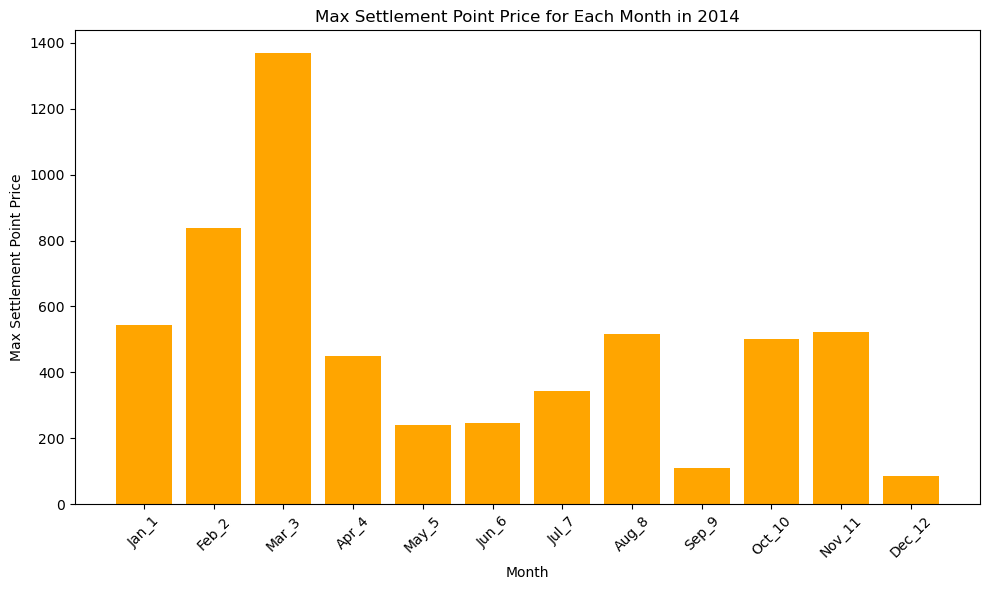

In [110]:
# Create a new column to extract the month name for ordering
max_prices_df['Month_Short'] = max_prices_df['Month'].str[:3]  # Extract first three letters

# Sort the max_prices_df DataFrame based on the defined order
max_prices_df['Month_Order'] = pd.Categorical(
    max_prices_df['Month_Short'], categories=month_order, ordered=True
)
max_prices_df = max_prices_df.sort_values('Month_Order')

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(max_prices_df["Month"], max_prices_df["Max Price"], color='orange')
plt.xlabel("Month")
plt.ylabel("Max Settlement Point Price")
plt.title("Max Settlement Point Price for Each Month in 2014")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

### Determine Threshold for Low and High Season based on Mean and Standard Deviation Approach using Max Monthly Prices

High Threshold: 831.0159567144929
High Threshold based on Average: 480.38916666666665
Low Threshold: 129.7623766188404


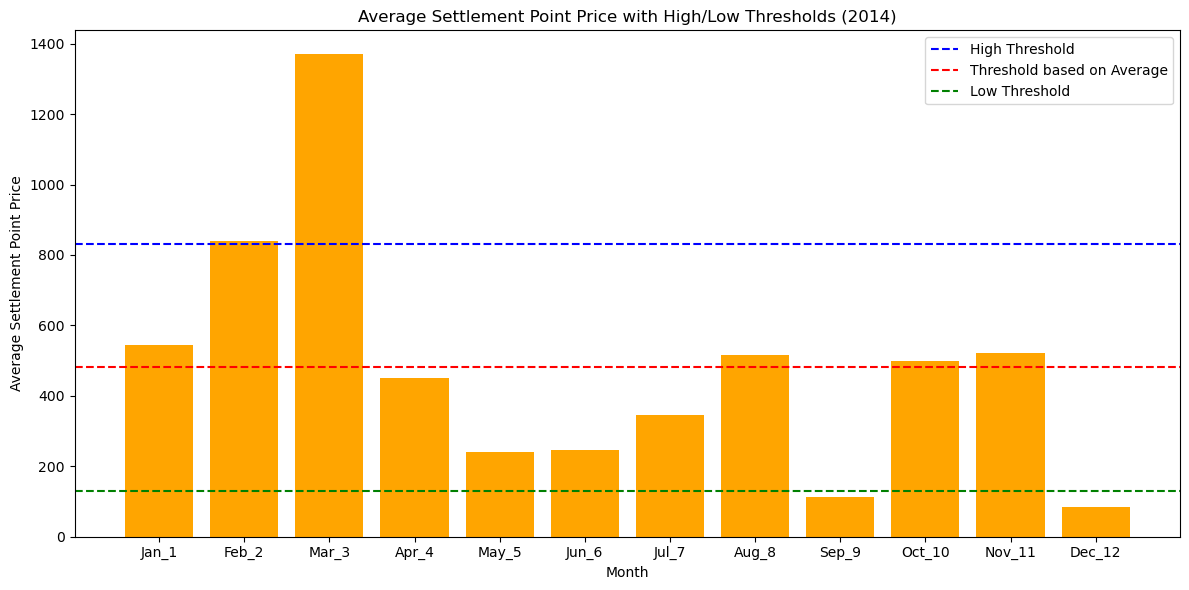

In [119]:
# Calculate mean and standard deviation of average prices for threshold determination
mean_price_max = max_prices_df["Max Price"].mean()
std_dev = max_prices_df["Max Price"].std()

# Define high, avg_threshold and low thresholds
high_threshold = mean_price + std_dev
avg_threshold_max=mean_price_max
low_threshold = mean_price - std_dev

# Print the thresholds
print(f"High Threshold: {high_threshold}")
print(f"High Threshold based on Average: {avg_threshold}")
print(f"Low Threshold: {low_threshold}")

# Plot the bar chart with thresholds
plt.figure(figsize=(12, 6))
plt.bar(max_prices_df["Month"], max_prices_df["Max Price"], color="orange")
plt.axhline(high_threshold, color="blue", linestyle="--", label="High Threshold")
plt.axhline(avg_threshold, color="red", linestyle="--", label="Threshold based on Average")
plt.axhline(low_threshold, color="green", linestyle="--", label="Low Threshold")
plt.xlabel("Month")
plt.ylabel("Average Settlement Point Price")
plt.title("Average Settlement Point Price with High/Low Thresholds (2014)")
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

In [122]:
# Filter months based on thresholds

# Months over and under the average threshold (mean-based)
months_over_avg = max_prices_df[max_prices_df["Max Price"] > avg_threshold_max]["Month"].tolist()
months_under_avg = max_prices_df[max_prices_df["Max Price"] < avg_threshold_max]["Month"].tolist()

# Display the results
results = {
    "Months Over Average Threshold": months_over_avg,
    "Months Under Average Threshold": months_under_avg,
}

results

{'Months Over Average Threshold': ['Jan_1',
  'Feb_2',
  'Mar_3',
  'Aug_8',
  'Oct_10',
  'Nov_11'],
 'Months Under Average Threshold': ['Apr_4',
  'May_5',
  'Jun_6',
  'Jul_7',
  'Sep_9',
  'Dec_12']}

### Determine Threshold for Low and High Season based on Percentile-Based Approach using Max Montly Prices

High Threshold (75th Percentile): 526.5725
Median  Threshold (50th Percentile): 474.955
Low Threshold (25th Percentile): 243.91250000000002


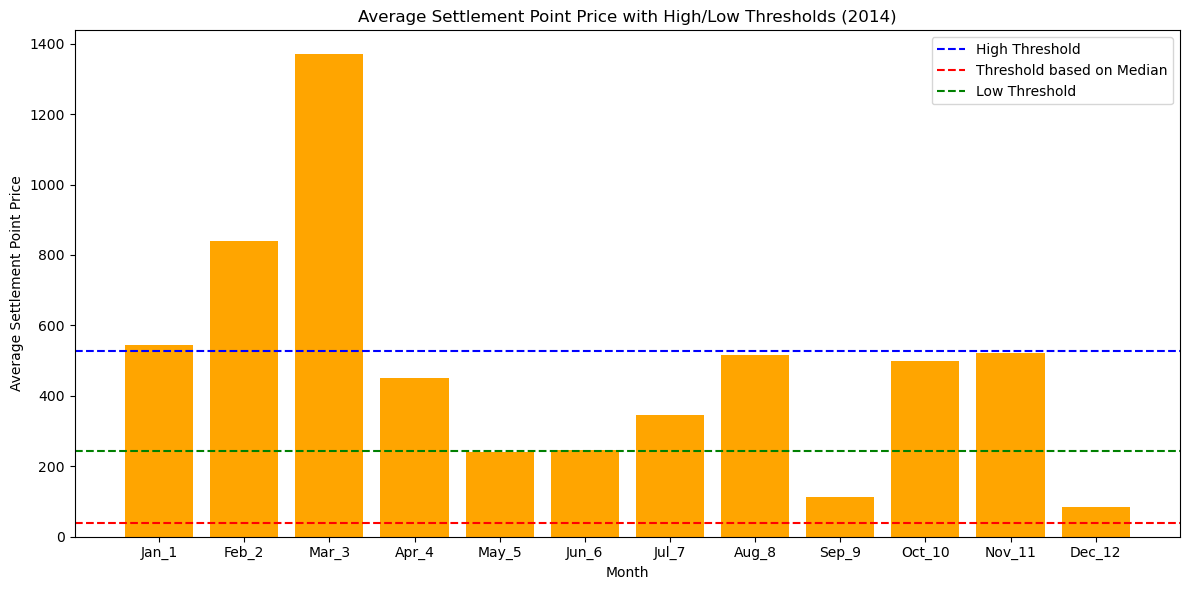

In [121]:
# Define high (Higher Quartile), Median and low (Low Quartile) thresholds using Percentile-Based Approach
high_threshold_per = max_prices_df["Max Price"].quantile(0.75)
median_threshold_max=max_prices_df["Max Price"].quantile(0.50)
low_threshold_per = max_prices_df["Max Price"].quantile(0.25)
# Print the thresholds
print(f"High Threshold (75th Percentile): {high_threshold_per}")
print(f"Median  Threshold (50th Percentile): {median_threshold_max}")
print(f"Low Threshold (25th Percentile): {low_threshold_per}")


# Plot the bar chart with thresholds
plt.figure(figsize=(12, 6))
plt.bar(max_prices_df["Month"], max_prices_df["Max Price"], color="orange")
plt.axhline(high_threshold_per, color="blue", linestyle="--", label="High Threshold")
plt.axhline(median_threshold_per, color="red", linestyle="--", label="Threshold based on Median")
plt.axhline(low_threshold_per, color="green", linestyle="--", label="Low Threshold")
plt.xlabel("Month")
plt.ylabel("Average Settlement Point Price")
plt.title("Average Settlement Point Price with High/Low Thresholds (2014)")
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

In [123]:
# Filter months based on thresholds

# Months over and under the median threshold (percentile-based)
months_over_median = max_prices_df[max_prices_df["Max Price"] > median_threshold_max]["Month"].tolist()
months_under_median = max_prices_df[max_prices_df["Max Price"] < median_threshold_max]["Month"].tolist()


# Display the results
results = {
    "Months Over Median Threshold": months_over_median,
    "Months Under Median Threshold": months_under_median,
}

results


{'Months Over Median Threshold': ['Jan_1',
  'Feb_2',
  'Mar_3',
  'Aug_8',
  'Oct_10',
  'Nov_11'],
 'Months Under Median Threshold': ['Apr_4',
  'May_5',
  'Jun_6',
  'Jul_7',
  'Sep_9',
  'Dec_12']}

### It seems the months over and under the median and mean thresholds are identical for both average and maxium monthly settlement price.

### Hence we determine the 

###  Months of High Seasons as: **['Jan', 'Feb', 'Mar', 'May', 'Sep', 'Nov']**
### Months of High Seasons as: **['Apr', 'Jun', 'Jul', 'Aug', 'Oct', 'Dec']**

## Average Settlement Point Price for Each Hour Across All Months in 2014

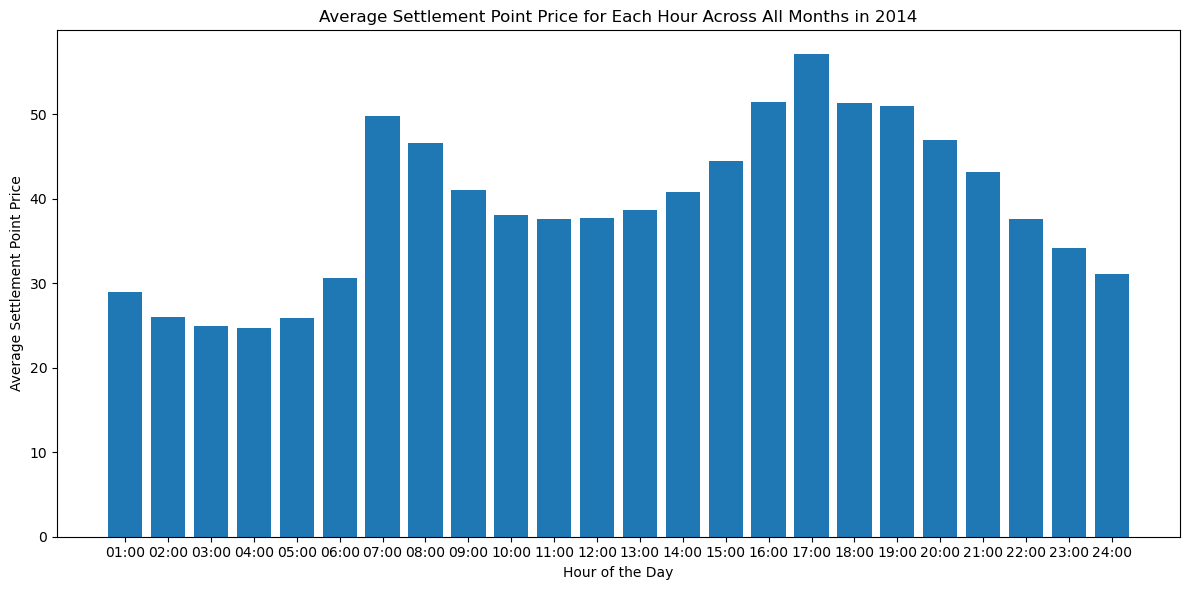

: 

In [ ]:
# Initialize a dictionary to store hourly averages across all months
hourly_averages = {}

# Iterate over each sheet (representing each month)
for sheet_name in market_data_2014.sheet_names:
    # Load the data from the current sheet
    sheet_data = market_data_2014.parse(sheet_name)
    
    # Ensure the "Settlement Point Price" and "Hour" columns exist before processing
    if "Settlement Point Price" in sheet_data.columns and "Hour Ending" in sheet_data.columns:
        # Group by the hour and calculate the mean for "Settlement Point Price"
        hourly_avg = sheet_data.groupby("Hour Ending")["Settlement Point Price"].mean()
        
        # Aggregate hourly averages across all sheets
        for hour, avg_price in hourly_avg.items():
            if hour in hourly_averages:
                hourly_averages[hour].append(avg_price)
            else:
                hourly_averages[hour] = [avg_price]

# Calculate the overall average for each hour across all months
hourly_average_final = {hour: np.mean(prices) for hour, prices in hourly_averages.items()}

# Convert the dictionary to a DataFrame for easier plotting
hourly_average_df = pd.DataFrame(list(hourly_average_final.items()), columns=["Hour", "Average Price"])
hourly_average_df = hourly_average_df.sort_values("Hour")

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(hourly_average_df["Hour"], hourly_average_df["Average Price"], width=0.8)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Settlement Point Price")
plt.title("Average Settlement Point Price for Each Hour Across All Months in 2014")
plt.xticks(hourly_average_df["Hour"])
plt.tight_layout()

# Display the histogram
plt.show()